In [1]:
# 오늘 할 것: session
# 복습
Client            HTTP              Server
          ---------------------->
DOM1       <----------------------   HTML => Browser를 대신(bs4)
(서로다른DOM)---------------------->
DOM2       <----------------------   HTML => Browser를 대신(bs4)
         /////////// JS engine => selenium(추천X, 브라우저 띄우기 때문에 느리다.)
(서로같은DOM)----------------------> XmlHttpRequest JS
        DHTML / AJAX => 어제의 핵심(네트워크에서 찾기)
DOM2      <---------------------- HTML/Data(application/json, javascript, ...) => Browser를 대신(bs4X)


In [3]:
Client                          Server
      -------------------------> (id,pw)
      <------------------------- http.response.header['set-cookie']

      -------------------------> 이메일 클릭
내메일  <------------------------- 

Cookie                           Session     (보통 두개 합쳐서 Session이라고 부른다)
      -------------------------> 
      <------------------------- 

- 웹디비를 빼고 생각
- 이번주가 실습할 수 있는 마지막 시간

SyntaxError: invalid syntax (4270590915.py, line 1)

In [26]:
from requests import request

url = "https://lms.sunde41.net"
resp = request("GET",url)

In [27]:
from bs4 import BeautifulSoup

dom = BeautifulSoup(resp.text, "html.parser")

In [91]:
for node in dom.select_one('form input[name]'):
    print(node.arrts['name'], node.attrs['value'] if node.has_attr('value') else '')

In [15]:
dom.select_one('form').attrs

{'action': '/auth/login', 'method': 'POST', 'name': 'login_user_form'}

In [35]:
from requests.compat import urljoin

params = {
    'next':'/',
    'email': "kmjoyit21045@gmail.com",
    'password': "01094117237",
    'remember':1
}

resp = request("POST", urljoin(url, dom.select_one('form').attrs['action']),data =params) 

In [36]:
resp.status_code, resp.headers # 200이면 로그인 성공

(200,
 {'Server': 'nginx/1.18.0 (Ubuntu)', 'Date': 'Wed, 20 Mar 2024 00:37:05 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'session=bW-oKd3wh1FDFRJmLvGlreqc2ARAYevE74Wfo-Jc9TA; Expires=Sat, 20 Apr 2024 00:37:05 GMT; HttpOnly; Path=/', 'Content-Encoding': 'gzip'})

In [37]:
resp.text

'<!doctype html><html lang="ko" data-overlayscrollbars-initialize><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no"><meta name="robots" content="noindex,nofollow"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><title>대시보드 : 고려대학교 지능정보SW아카데미</title><link type="text/css" href="/static/tabler/tabler.min.css?v=1.0.0" rel="stylesheet"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/overlayscrollbars/2.3.1/styles/overlayscrollbars.min.css" integrity="sha512-dhmzNSvjN84unnxuYaQ0LKELjD61PTGKOHUX6ddzXjy6q/4sRBFQKO8L48oqhqstwt+V/QHxLDM4NGjeVkGrgQ==" crossorigin="anonymous" referrerpolicy="no-referrer"><link type="text/css" href="/static/tabler/extra.css?v=1.0.18" rel="stylesheet"><link href="/static/fullcalendar/fullcalendar.min.css?v=1.0.0" rel="stylesheet"><link href="/static/apexcharts/apexcharts.css?v=1.0.0" rel="stylesheet"><style>.apexcharts-canvas>svg{background-color:transp

In [38]:
cookie = {
    'session':'k71PipDWBWTcLRadNX-FtE6-ngfyRR7POjBTeIg-i7I'
}
request('GET', url, cookies=cookie).text
# request('GET', url).text

'<!doctype html><html lang="ko" data-overlayscrollbars-initialize><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no"><meta name="robots" content="noindex,nofollow"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><title>대시보드 : 고려대학교 지능정보SW아카데미</title><link type="text/css" href="/static/tabler/tabler.min.css?v=1.0.0" rel="stylesheet"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/overlayscrollbars/2.3.1/styles/overlayscrollbars.min.css" integrity="sha512-dhmzNSvjN84unnxuYaQ0LKELjD61PTGKOHUX6ddzXjy6q/4sRBFQKO8L48oqhqstwt+V/QHxLDM4NGjeVkGrgQ==" crossorigin="anonymous" referrerpolicy="no-referrer"><link type="text/css" href="/static/tabler/extra.css?v=1.0.18" rel="stylesheet"><link href="/static/fullcalendar/fullcalendar.min.css?v=1.0.0" rel="stylesheet"><link href="/static/apexcharts/apexcharts.css?v=1.0.0" rel="stylesheet"><style>.apexcharts-canvas>svg{background-color:transp

In [41]:
resp.headers['set-cookie'].split(";")[0].split('=')

['session', 'bW-oKd3wh1FDFRJmLvGlreqc2ARAYevE74Wfo-Jc9TA']

In [43]:
from requests.cookies import cookiejar_from_dict, create_cookie

In [44]:
type(create_cookie('k','v'))

http.cookiejar.Cookie

In [46]:
c = cookiejar_from_dict(cookie)
request('GET', url, cookies=c).text

'<!doctype html><html lang="ko" data-overlayscrollbars-initialize><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no"><meta name="robots" content="noindex,nofollow"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><title>로그인 : 고려대학교 지능정보SW아카데미</title><link type="text/css" href="/static/tabler/tabler.min.css?v=1.0.0" rel="stylesheet"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/overlayscrollbars/2.3.1/styles/overlayscrollbars.min.css" integrity="sha512-dhmzNSvjN84unnxuYaQ0LKELjD61PTGKOHUX6ddzXjy6q/4sRBFQKO8L48oqhqstwt+V/QHxLDM4NGjeVkGrgQ==" crossorigin="anonymous" referrerpolicy="no-referrer"><link type="text/css" href="/static/tabler/extra.css?v=1.0.18" rel="stylesheet"><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon"><link rel="icon" href="/static/favicon/favicon.ico" type="image/x-icon"></head><body data-bs-theme style="opacity:0;" class="

In [47]:
c.set('k','v')

Cookie(version=0, name='k', value='v', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)

In [48]:
from requests.sessions import Session

In [50]:
sess = Session()  # 쿠키에 대해 보존 처리를 해준다.

In [51]:
request() => set-cooki => 내가 관리
sess.request()  => set-cookie => session이 관리

SyntaxError: cannot assign to function call (1036436476.py, line 1)

In [60]:
sess.cookies.set('session','k71PipDWBWTcLRadNX-FtE6-ngfyRR7POjBTeIg-i7I', domain="lms.sunde41.net")

Cookie(version=0, name='session', value='k71PipDWBWTcLRadNX-FtE6-ngfyRR7POjBTeIg-i7I', port=None, port_specified=False, domain='lms.sunde41.net', domain_specified=True, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)

In [61]:
sess.request('GET', url).text

'<!doctype html><html lang="ko" data-overlayscrollbars-initialize><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no"><meta name="robots" content="noindex,nofollow"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><title>대시보드 : 고려대학교 지능정보SW아카데미</title><link type="text/css" href="/static/tabler/tabler.min.css?v=1.0.0" rel="stylesheet"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/overlayscrollbars/2.3.1/styles/overlayscrollbars.min.css" integrity="sha512-dhmzNSvjN84unnxuYaQ0LKELjD61PTGKOHUX6ddzXjy6q/4sRBFQKO8L48oqhqstwt+V/QHxLDM4NGjeVkGrgQ==" crossorigin="anonymous" referrerpolicy="no-referrer"><link type="text/css" href="/static/tabler/extra.css?v=1.0.18" rel="stylesheet"><link href="/static/fullcalendar/fullcalendar.min.css?v=1.0.0" rel="stylesheet"><link href="/static/apexcharts/apexcharts.css?v=1.0.0" rel="stylesheet"><style>.apexcharts-canvas>svg{background-color:transp

In [62]:
sess.cookies

<RequestsCookieJar[Cookie(version=0, name='session', value='k71PipDWBWTcLRadNX-FtE6-ngfyRR7POjBTeIg-i7I', port=None, port_specified=False, domain='lms.sunde41.net', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=1713573978, discard=False, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

In [59]:
sess.cookies.clear()

In [65]:
request('GET', url, cookies=sess.cookies).text

'<!doctype html><html lang="ko" data-overlayscrollbars-initialize><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no"><meta name="robots" content="noindex,nofollow"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><title>대시보드 : 고려대학교 지능정보SW아카데미</title><link type="text/css" href="/static/tabler/tabler.min.css?v=1.0.0" rel="stylesheet"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/overlayscrollbars/2.3.1/styles/overlayscrollbars.min.css" integrity="sha512-dhmzNSvjN84unnxuYaQ0LKELjD61PTGKOHUX6ddzXjy6q/4sRBFQKO8L48oqhqstwt+V/QHxLDM4NGjeVkGrgQ==" crossorigin="anonymous" referrerpolicy="no-referrer"><link type="text/css" href="/static/tabler/extra.css?v=1.0.18" rel="stylesheet"><link href="/static/fullcalendar/fullcalendar.min.css?v=1.0.0" rel="stylesheet"><link href="/static/apexcharts/apexcharts.css?v=1.0.0" rel="stylesheet"><style>.apexcharts-canvas>svg{background-color:transp

In [66]:
# 유튜브 : 파이튜브 사용하자. 

In [71]:
url = "https://lms.sunde41.net/course/6"
request('GET', url).status_code, cookie

(403, {'session': 'k71PipDWBWTcLRadNX-FtE6-ngfyRR7POjBTeIg-i7I'})

In [72]:
sess.request('GET',url).text

'<!doctype html><html lang="ko" data-overlayscrollbars-initialize><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no"><meta name="robots" content="noindex,nofollow"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><title>수업 게시판 : 고려대학교 지능정보SW아카데미</title><link type="text/css" href="/static/tabler/tabler.min.css?v=1.0.0" rel="stylesheet"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/overlayscrollbars/2.3.1/styles/overlayscrollbars.min.css" integrity="sha512-dhmzNSvjN84unnxuYaQ0LKELjD61PTGKOHUX6ddzXjy6q/4sRBFQKO8L48oqhqstwt+V/QHxLDM4NGjeVkGrgQ==" crossorigin="anonymous" referrerpolicy="no-referrer"><link type="text/css" href="/static/tabler/extra.css?v=1.0.18" rel="stylesheet"><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon"><link rel="icon" href="/static/favicon/favicon.ico" type="image/x-icon"></head><body data-bs-theme="dark" style="opacity:0

In [88]:
url = "https://lms.sunde41.net/auth/login"

params = {
    'next':'/',
    'email': "kmjoyit21045@gmail.com",
    'password': "01094117237",
    'remember':1
}
sess.request('POST', url, data=params)
resp.headers

{'Server': 'nginx/1.18.0 (Ubuntu)', 'Date': 'Wed, 20 Mar 2024 00:56:49 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'session=bW-oKd3wh1FDFRJmLvGlreqc2ARAYevE74Wfo-Jc9TA; Expires=Sat, 20 Apr 2024 00:56:49 GMT; HttpOnly; Path=/', 'Content-Encoding': 'gzip'}

In [89]:
sess.cookies.clear()
sess.cookies.set('session','bW-oKd3wh1FDFRJmLvGlreqc2ARAYevE74Wfo-Jc9TA', domain="lms.sunde41.net")

Cookie(version=0, name='session', value='bW-oKd3wh1FDFRJmLvGlreqc2ARAYevE74Wfo-Jc9TA', port=None, port_specified=False, domain='lms.sunde41.net', domain_specified=True, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)

In [90]:
url = "https://lms.sunde41.net/course/6"
resp = sess.request('GET', url)
resp.status_code, resp.headers

(200,
 {'Server': 'nginx/1.18.0 (Ubuntu)', 'Date': 'Wed, 20 Mar 2024 00:59:18 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'session=bW-oKd3wh1FDFRJmLvGlreqc2ARAYevE74Wfo-Jc9TA; Expires=Sat, 20 Apr 2024 00:59:18 GMT; HttpOnly; Path=/', 'Content-Encoding': 'gzip'})

In [ ]:
# 왜 안됐던 거지? => 세션이 물리적으로 바뀌었었다. 

In [92]:
# 위키는 미러링 떠도 된다. 광고만 안붙이면 됨

In [105]:
dom = BeautifulSoup(resp.text, 'html.parser')
dom.select('#lesson tbody > tr > td:last-child a.dropdown-item[href]')[:2]
for node in dom.select('#lesson tbody > tr > td:last-child a.dropdown-item[href]')[:2]:
    print(node.attrs['href'])

/static/uploads/lectures/6/Database.pdf
/static/uploads/lectures/6/Functional%20Programming%20in%20Python.pdf


In [ ]:
# pdf 파일 다운 받기 => 실패
resp = sess.request('GET',  urljoin(url,'/'))  # 아 놓쳤다. 파일 경로 어떻게 찾았지?

In [106]:
# 게시물 올라왔을 때의 알람이나, 조발표 났을 때, 알람 오도록 할 수 있을까?

In [ ]:
GET => Read    https://lms.sunde41.net/qna/detail/77
POST => Write  https://lms.sunde41.net/qna/detail/77
# 좋은 사이트의 url은 잘 바뀌지 않는다

In [107]:
url = "https://lms.sunde41.net/qna/detail/77"
sess.request('POST',url, data={'description':'hello lms'})

<Response [200]>

In [116]:
url = "https://lms.sunde41.net/qna/detail/77"
resp = sess.request('GET', url)
dom = BeautifulSoup(resp.text,'html.parser')

In [117]:
dom.select('.page-body .card-body .list-group-item .row > .col-auto:has(> a)')

[<div class="col-auto"><a class="btn btn-warning btn-sm btn-icon" href="#" onclick="callEdit(91)"><svg class="icon icon-tabler icon-tabler-edit" fill="none" height="16" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24 24" width="16" xmlns="http://www.w3.org/2000/svg"><path d="M0 0h24v24H0z" fill="none" stroke="none"></path><path d="M7 7h-1a2 2 0 0 0 -2 2v9a2 2 0 0 0 2 2h9a2 2 0 0 0 2 -2v-1"></path><path d="M20.385 6.585a2.1 2.1 0 0 0 -2.97 -2.97l-8.415 8.385v3h3l8.385 -8.415z"></path><path d="M16 5l3 3"></path></svg></a><a class="btn btn-danger btn-sm btn-icon confirmation" href="/qna/detail/77/comments/delete/91"><svg class="icon icon-tabler icon-tabler-trash" fill="none" height="16" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24 24" width="16" xmlns="http://www.w3.org/2000/svg"><path d="M0 0h24v24H0z" fill="none" stroke="none"></path><path d="M4 7l16 0"></path><path d="M10 11l0

In [122]:
for a in dom.select('.page-body .card-body .list-group-item .row > .col-auto:has(> a) > a:last-child'):
    # print(a['href'])
    sess.request('GET', urljoin(url,a.attrs['href']))

In [108]:
url = "https://lms.sunde41.net/qna/detail/77/comments/delete/82 "

In [123]:
url = "https://lms.sunde41.net/qna/delete/77" # 된다 => 표준을 지켜서 잘 만들었다는 증거

In [124]:
# 네이버 로그인 할 수 있긴한데 어렵다.

In [146]:
url = "https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/"
sess.cookies.clear()

resp = sess.request('GET', url)
dom = BeautifulSoup(resp.text, 'html.parser')

dom.select('form[action] input[name]')

[<input id="localechange" name="localechange" type="hidden" value=""/>,
 <input id="dynamicKey" name="dynamicKey" type="hidden" value="mAgUQtOyY0t6PLUUiVuQJ7SPavMMN9jzGfEiJRAgQ_4sgEo5YR4s-sVHfQ4spGVbru4T56sLEHJ_qJQJJIupxZKUGTss-Ha8CGuHQgz2pe4"/>,
 <input id="encpw" name="encpw" type="hidden" value=""/>,
 <input id="enctp" name="enctp" type="hidden" value="1"/>,
 <input id="svctype" name="svctype" type="hidden" value="1"/>,
 <input id="smart_LEVEL" name="smart_LEVEL" type="hidden" value="1"/>,
 <input id="bvsd" name="bvsd" type="hidden" value=""/>,
 <input id="encnm" name="encnm" type="hidden" value=""/>,
 <input id="locale" name="locale" type="hidden" value="ko_KR"/>,
 <input id="url" name="url" type="hidden" value="https://www.naver.com/"/>,
 <input class="input_text" id="id" maxlength="41" name="id" placeholder="아이디" title="아이디" type="text" value=""/>,
 <input class="input_text" id="pw" maxlength="16" name="pw" placeholder="비밀번호" title="비밀번호" type="password"/>,
 <input class="input_k

In [147]:
for node in dom.select('form[action] input[name]'):
    print(node.attrs['name'], node.attrs['value'] if node.has_attr('value') else '')

localechange 
dynamicKey mAgUQtOyY0t6PLUUiVuQJ7SPavMMN9jzGfEiJRAgQ_4sgEo5YR4s-sVHfQ4spGVbru4T56sLEHJ_qJQJJIupxZKUGTss-Ha8CGuHQgz2pe4
encpw 
enctp 1
svctype 1
smart_LEVEL 1
bvsd 
encnm 
locale ko_KR
url https://www.naver.com/
id 
pw 
nvlong off


In [136]:
ip, pw => JS(RSA) => 로그인 # 이렇게 로그인 가능하다. 보안 수업이면 한다.

SyntaxError: invalid syntax (691788877.py, line 1)

In [154]:
c = '''
NID_AUT	KyUbPmBS2Zle0wF5S+X2jaiCGEruGJlk+0eNVhMrVSCQRlx31GFXb2oAvnU78Rvl	.naver.com	/	Session	71	✓	✓	Lax		Medium	
NID_JKL	uf+UsNebfm6U8MR/CSPjDAW++XLm3USCptCS8mYRA4c=	.naver.com	/	Session	51		✓			Medium	
NID_SES	AAABomNeA0Gq6YcBgHrFaR6RJo2hVnIRPQ3sdDrJYr5IsgAwfg77jirJ5fBRpDTdwMCvv0B0f+hgQTP2AxqYcqVMtLMQ7GPyDoMwV/IIdmw0HVDY3NI7nNRIrDqHJCxjBQbcBw4T89mx/KUzA6gl1X6xt9DQgW1rLSEzYnCKkntGJDyBFAMjywUBomsqEz+34w9fR3S/v0XHYqNd4W+Usi9uCNCnEyaTjetkbgI+/K+Jhg1mmjOzXzll+ertkYjgcwk4K4YPN+uN2htK7n6PZwxqY9CeT57GnW25iw6YfRviSayhLAXdlvXNhkakS98BsYOluAF+Rag2SOqDptaAXUAvoIjVM5QQAzH09peMOzDsmqG5peUMJ8ctdGzDLu78Bx/hh9W/csWi7l7jdkefLU9OmGRgPxTKvq7e9v1i67lcIuVBXCXhs/Wr5ox27xi8tNvPJuVEBadHAVeKSpkNvOYqpyo2K4KhnIout0GBhHBkeW9hdqGOoWYJmQ689tGDF8ig6bDMUfW7ZpcsIDxH3eALvOZ4PrcrFz6zeAODO3hGl7iJA7VWOeKAc8pB4iuCJKEiQQ==	.naver.com	/	Session	591		✓	Lax		Medium	
NM_srt_chzzk	1	www.naver.com	/	2024-03-20T02:18:30.000Z	13					Medium	
NNB	HMVTIJNH67AWK	.naver.com	/	2025-04-24T01:56:02.372Z	16		✓	None		Medium	
PM_CK_loc	99770fda1fc68c0bdfc0549212eba9e40a2388c0fb9e6501a16a7de87d12cc3d	www.naver.com	/	2024-03-21T01:50:57.797Z	73	✓				Medium	
_ga	GA1.2.302465339.1709524431	.naver.com	/	2025-04-08T03:54:24.799Z	29					Medium	
_ga_TSE3G32LNF	GS1.2.1709524431.1.1.1709524464.0.0.0	.naver.com	/	2025-04-08T03:54:24.802Z	51					Medium	
nid_buk	HMVTIJNH67AWK	.nid.naver.com	/	2025-03-17T07:45:33.042Z	20		✓			Medium	
nid_inf	615582541	.naver.com	/	Session	16					Medium	
nid_slevel	1	.nid.naver.com	/	2025-03-20T01:51:02.000Z	11					Medium	
page_uid	iQBJTdqo15VsslDitg8ssssstWh-078286	.naver.com	/	Session	42					Medium	
tooltip_paging_close	1	www.naver.com	/	2025-04-12T03:00:27.703Z	21					Medium	'''
for kv in [ line.split('\t')[:2] for line in c.splitlines()[1:]]:
    sess.cookies.set(kv[0], kv[1])
print(sess.cookies)

<RequestsCookieJar[<Cookie NID_JKL=uf+UsNebfm6U8MR/CSPjDAW++XLm3USCptCS8mYRA4c= for />, <Cookie NID_SES=AAABomNeA0Gq6YcBgHrFaR6RJo2hVnIRPQ3sdDrJYr5IsgAwfg77jirJ5fBRpDTdwMCvv0B0f+hgQTP2AxqYcqVMtLMQ7GPyDoMwV/IIdmw0HVDY3NI7nNRIrDqHJCxjBQbcBw4T89mx/KUzA6gl1X6xt9DQgW1rLSEzYnCKkntGJDyBFAMjywUBomsqEz+34w9fR3S/v0XHYqNd4W+Usi9uCNCnEyaTjetkbgI+/K+Jhg1mmjOzXzll+ertkYjgcwk4K4YPN+uN2htK7n6PZwxqY9CeT57GnW25iw6YfRviSayhLAXdlvXNhkakS98BsYOluAF+Rag2SOqDptaAXUAvoIjVM5QQAzH09peMOzDsmqG5peUMJ8ctdGzDLu78Bx/hh9W/csWi7l7jdkefLU9OmGRgPxTKvq7e9v1i67lcIuVBXCXhs/Wr5ox27xi8tNvPJuVEBadHAVeKSpkNvOYqpyo2K4KhnIout0GBhHBkeW9hdqGOoWYJmQ689tGDF8ig6bDMUfW7ZpcsIDxH3eALvOZ4PrcrFz6zeAODO3hGl7iJA7VWOeKAc8pB4iuCJKEiQQ== for />, <Cookie NM_srt_chzzk=1 for />, <Cookie NNB=HMVTIJNH67AWK for />, <Cookie PM_CK_loc=99770fda1fc68c0bdfc0549212eba9e40a2388c0fb9e6501a16a7de87d12cc3d for />, <Cookie _ga=GA1.2.302465339.1709524431 for />, <Cookie _ga_TSE3G32LNF=GS1.2.1709524431.1.1.1709524464.0.0.0 for />, <Cookie nid_buk=HMVTIJNH67AWK f

In [155]:
import re

In [156]:
str.split()
str.splitlines()

TypeError: unbound method str.split() needs an argument

In [157]:
url = 'https://mail.naver.com'

resp = request('GET', url)
dom = BeautifulSoup(resp.text,'html.parser')
dom.title
# status_code, content-type 꼭 확인하기

<title>네이버 : 로그인</title>

In [158]:
sess.cookies

<RequestsCookieJar[Cookie(version=0, name='NID_JKL', value='uf+UsNebfm6U8MR/CSPjDAW++XLm3USCptCS8mYRA4c=', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='NID_SES', value='AAABomNeA0Gq6YcBgHrFaR6RJo2hVnIRPQ3sdDrJYr5IsgAwfg77jirJ5fBRpDTdwMCvv0B0f+hgQTP2AxqYcqVMtLMQ7GPyDoMwV/IIdmw0HVDY3NI7nNRIrDqHJCxjBQbcBw4T89mx/KUzA6gl1X6xt9DQgW1rLSEzYnCKkntGJDyBFAMjywUBomsqEz+34w9fR3S/v0XHYqNd4W+Usi9uCNCnEyaTjetkbgI+/K+Jhg1mmjOzXzll+ertkYjgcwk4K4YPN+uN2htK7n6PZwxqY9CeT57GnW25iw6YfRviSayhLAXdlvXNhkakS98BsYOluAF+Rag2SOqDptaAXUAvoIjVM5QQAzH09peMOzDsmqG5peUMJ8ctdGzDLu78Bx/hh9W/csWi7l7jdkefLU9OmGRgPxTKvq7e9v1i67lcIuVBXCXhs/Wr5ox27xi8tNvPJuVEBadHAVeKSpkNvOYqpyo2K4KhnIout0GBhHBkeW9hdqGOoWYJmQ689tGDF8ig6bDMUfW7ZpcsIDxH3eALvOZ4PrcrFz6zeAODO3hGl7iJA7VWOeKAc8pB4iuCJKEiQQ==', port=None, port_specified

In [165]:
resp = request('GET', url, cookies=sess.cookies)
dom = BeautifulSoup(resp.text,'html.parser')
dom

<!DOCTYPE html>
<html><head lang="ko"><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,viewport-fit=cover" name="viewport"/><title>메일</title><link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/hdpi_72X72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/xhdpi_96x96.png" rel="apple-touch-icon-precomposed" sizes="96x96"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/xxhpdi_144x144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/xxxhpdi_192x192.png" rel="apple-touch-icon-precomposed" sizes="192x192"/><script>window.nhn = {};
      window.gnb_option = {
        gnb_service: "mail",
        gnb_template: "gnb_utf8",
        gnb_logout: "https://www.naver.com",
        gnb_one_naver: 1,
        gnb_item_hide_option: 8,
      

In [182]:
url = '''https://mail.naver.com/json/list'''
params = {
    'folderSN':5,
    'page':1,
    'viewMode':'time',
    'previewMode':1,
    'sortField':1,
    'sortType':0,
    'u':'991221kmj'
}
resp = request('POST', url, cookies=sess.cookies, params=params)
resp.json().__len__()
for mail in resp.json()['mailData']:
    print(mail['subject'])

# 해결방법
# cookie를 사용하여 로그인
# 파라미터 수정하여 결과 변화 확인
# HTTP 매소드 잘 확인하기
# 동적인 페이지의 요청 url 찾기
# user-agent

# 스팸메일함의 베이지어 모델을 만들어볼 것이다. 



Purchase Order Confirmation: New Order #5977336
(광고) YBM인강 3월 새출발을 응원하며 [영어 무한패스] 최대 5만원 할인 쿠폰을 드려요♡
Should You Date Across Big Age Differences?
(광고) [중소벤처기업부 SW인력 지원 프로그램] 고용지원금 최대 600만원 지원! - 3월29일 마감
(광고) YBM인강 새학기 맞이 한정판 패키지와 ETS 기출문제집+인강 최대 50% 할인 판매중 ♨
(광고)퀴즈만 맞춰도 경품이!? 그랜드슬래머 퀴즈 이벤트
(광고) YBM인강 최대 300% 토익환급코스 이번 기수 오늘 마감★ 토익응시권 전원 무료!
(광고) YBM인강 12주 습관형성 챌린지 ▷ 매일 1강만 들으면 최종 적립금의 ♥2배♥ 환급 가능
How to Make Politics Less Hostile
(광고) YBM인강 토익 대비 무료특강으로 고득점 달성! 
(광고) JPT 정기시험(2024.03.24(일) 시행) 접수마감 5일 전 입니다!
(광고) 삼성전자와 함께 &#39;업무를 효율적으로, 휴식을 즐겁게!&#39; 라이브 세미나
(광고)  원어민 1:1 전화영어·화상영어 무료체험 기회 도착💌
(광고) 마감 D-7 ESG 심화 워크숍 택소노미 완전정복
How Embracing Uncertainty Can Improve Your Life


In [195]:
# CSRF 토큰 없음

OAuth
                                token
                                => key
API:CSRF 
- callable service URI .....  => 우리가 호출(CSRF)
- callable service URI ..... 
- callable service URI .....
- callable service URI .....
- callable service URI .....

In [ ]:
url = 'https://www.instagram.com/api/v1/web/accounts/login/ajax/'
params = {
    'enc_password': '#PWD_INSTAGRAM_BROWSER:10:1710903436:AY5QAJ/zov84M/C/FHrzQFUuXZ1eegmb9agrXUDeGpwJDolZCmmDnU6+GD7JsLXb1RzMvbs8SJ11IXXUehtO90OcyeJGsv/ox39tCGtqFB+5xkO7y1rEiD40nS86HdOpvnMWlEMMGaUdPK6IVKXj',
    'optIntoOneTap': 'false',
    'queryParams': '{}',
    'trustedDeviceRecords': '{}',
    'username': 'gon0121+dev@gmail.com'
}

resp = request('POST', url, data=params)
resp.status_code, resp.reason, resp.headers, resp.json()

<!DOCTYPE html>
<html class="_9dls" dir="ltr" lang="en"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"/><meta content="noarchive, noimageindex" name="robots"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><meta content="#ffffff" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" rel="apple-touch-icon" sizes="120x120"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yx/r/H1l_HHqi4p6.png" rel="apple-touch-icon" sizes="152x152"/><link href="htt
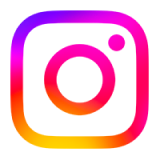
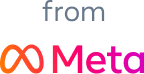

In [238]:
from bs4 import BeautifulSoup
url = 'https://www.instagram.com'
resp = request('GET', url)
dom = BeautifulSoup(resp.text, 'html.parser')
# Oauth 토큰 

In [233]:
from datetime import datetime

# CSRF 토큰 찾아오기
CSRF2 = re.findall('"csrf_token":"(.+?)"',resp.text, re.IGNORECASE)[0]
headers = {
    'X-Csrftoken':CSRF2
}

params = {}

# enc_password 설정하기
t = int(datetime.now().timestamp())
data = {
    "enc_password": f"#PWD_INSTAGRAM_BROWSER:0:{t}:{'Eldrj1221@'}",
    "queryParams": {},
    "trustedDeviceRecords": {},
    "username": "kmjoyit@gmail.com"
}

url = 'https://www.instagram.com/api/v1/web/accounts/login/ajax/'
resp = request('POST', url, headers=headers, data=data)
resp.status_code, resp.headers['content-type'], resp.json()

(200,
 'application/json; charset=utf-8',
 {'user': True,
  'userId': '65415610723',
  'authenticated': True,
  'oneTapPrompt': True,
  'has_onboarded_to_text_post_app': False,
  'status': 'ok'})

In [ ]:
# 쿠팡 크롤링

In [250]:
from requests.compat import urljoin
url = "https://www.coupang.com/np/search?component=&q=%EC%AB%80%EB%93%9C%EA%B8%B0&channel=user"
params = {
    'component':'',
    'q':'쫀드기',
    'channel':'user'
}
resp = request('GET', url)
resp.status_code, resp.headers['content-type']

KeyboardInterrupt: 